<div style="background-color:#96CDF2; padding:10px;color:#3B3C3E">
Licence <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">CC BY-SA</a>
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0; float:right;" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png"/></a><br />
Germain Salvato Vallverdu - <tt>germain.vallverdu@univ-pau.fr</tt> <br />
<i><a href="http://iprem.univ-pau.fr/fr/index.html">IPREM</a> / <a href="http://www.univ-pau.fr/">Univ Pau &amp; Pays Adour</a></i>
</div>


# Reglin

Régression linéaire

---

En premier lieu, il est nécessaire d'importer certaines librairies et en particulier la librairie `pandas`. On importe également la librairie `numpy` (Numerical Python). Voici la façon usuelle d'importer ces deux librairies en leur donnant des noms plus courts, par commodité, `pd` pour `pandas` et `np` pour `numpy`.  Les modules `requests` et `io` seront utilisés pour lire les données depuis internet.

In [1]:
import numpy as np
import pandas as pd

# modules complémentaires pour lire les données depuis internet
import requests
import io



* Afficher un tableau avec un style



In [30]:
df = pd.read_csv("data/analyse/operations_enrichies.csv", index_col=0, parse_dates=True)
df.head()

libelle  montant  \
date_operation                                                          
2023-03-31                          DON XX XX XX XX XX XX XX    -1.44   
2023-04-03                               CARTE XX XX RAPT XX   -24.00   
2023-04-03                               CARTE XX XX RAPT XX   -73.00   
2023-04-03      VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX   676.00   
2023-04-03                        VIREMENT XX XX XX XX XX XX     4.80   

                solde_avt_ope      categ      type    tranche_depense    sens  \
date_operation                                                                  
2023-03-31            1515.25      AUTRE       DON             petite   debit   
2023-04-03            1513.81  TRANSPORT     CARTE             petite   debit   
2023-04-03            1489.81  TRANSPORT     CARTE             petite   debit   
2023-04-03            1416.81      AUTRE  VIREMENT  (pas une dépense)  credit   
2023-04-03            2092.81      AUTRE  VIREMENT  (pas une dépense)  credit   

                annee  mois  jour jour_sem  jour_sem_num  weekend  quart_mois  
date_operation                                                                 
2023-03-31       2023     3    31   Friday             5    False           4  
2023-04-03       2023     4     3   Monday             1    False           1  
2023-04-03       2023     4     3   Monday             1    False           1  
2023-04-03       2023     4     3   Monday             1    False           1  
2023-04-03       2023     4     3   Monday             1    False           1

In [32]:
df = pd.read_csv("data/analyse/operations.csv", index_col=1, parse_dates=True)
df.head()

identifiant_transaction date_valeur  \
date_operation                                        
2023-10-06                          242  2023-10-06   
2023-10-06                           25  2023-10-06   
2023-10-06                           69  2023-10-06   
2023-10-05                          299  2023-10-05   
2023-10-05                           45  2023-10-05   

                                             libelle  debit  credit    solde  
date_operation                                                                
2023-10-06      FORFAIT COMPTE SUPERBANK XX XX XX XX  -1.92     NaN  2513.79  
2023-10-06                   CARTE XX XX CHEZ LUC XX -10.00     NaN  2529.29  
2023-10-06            PRELEVEMENT XX TELEPHONE XX XX -13.58     NaN  2515.71  
2023-10-05                   CARTE XX XX XX XX XX XX -10.64     NaN  2539.29  
2023-10-05                         CARTE XX XX XX XX  -4.80     NaN  2549.93

In [143]:
url = "https://gitlab.com/gvallverdu/cours-python/-/raw/master/notebooks/pandas/preparation/data/nike_data.csv"
download = requests.get(url).content

df = pd.read_csv(
    io.StringIO(download.decode('latin1')), 
    sep=";", 
    index_col=0,
    # sélection de colonnes
    usecols=(0, 1, 2, 3, 6)
)
df.head()

Age  Utilisation  Sexe  Préférence
Numéro                                    
1        18            3     2           5
2        19            1     1           4
3        20            1     1           6
4        21            3     2           5
5        22            3     2           7

In [1]:
import sklearn
from sklearn import datasets

In [2]:
iris = datasets.load_iris(as_frame=True)

In [3]:
iris.data

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

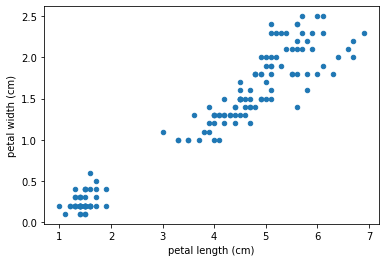

In [4]:
iris.data.plot.scatter(x="petal length (cm)", y="petal width (cm)")

In [6]:
import statsmodels.api as sm

In [7]:
X = sm.add_constant(iris.data["petal length (cm)"])
fit0 = sm.OLS(iris.data["petal width (cm)"], X).fit()
fit0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       petal width (cm)   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           4.68e-86
Time:                        10:12:57   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.3631      0.040     -9.131      0.000      -0.442      -0.285
petal length (cm)     0.4158      0.010     43.387      0.000       0.397       0.435
==============================================================================
Omnibus:                        5.765   Durbin-Watson:                   1.455
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.555
Skew:                           0.359   Prob(JB):                       0.0622
Kurtosis:                       3.611   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
from scipy.stats import linregress

In [12]:
a, b, r, pval, stderr = linregress(iris.data["petal length (cm)"], iris.data["petal width (cm)"])

In [13]:
a, b, r**2, stderr

(0.41575541635241114,
 -0.36307552131902776,
 0.9271098389904932,
 0.009582435790766206)

In [14]:
print(f"a = {a:.4f} +/- {stderr:.3f}")

a = 0.4158 +/- 0.010


In [26]:
x = iris.data["petal length (cm)"].values
print(f"b = {b:.4f} +/- {stderr * np.sqrt((x**2).mean()):.3f} \t {stderr * np.sqrt((x**2).mean()):.7f}")

b = -0.3631 +/- 0.040 	 0.0397620


In [15]:
fit0.bse

const                0.039762
petal length (cm)    0.009582
dtype: float64

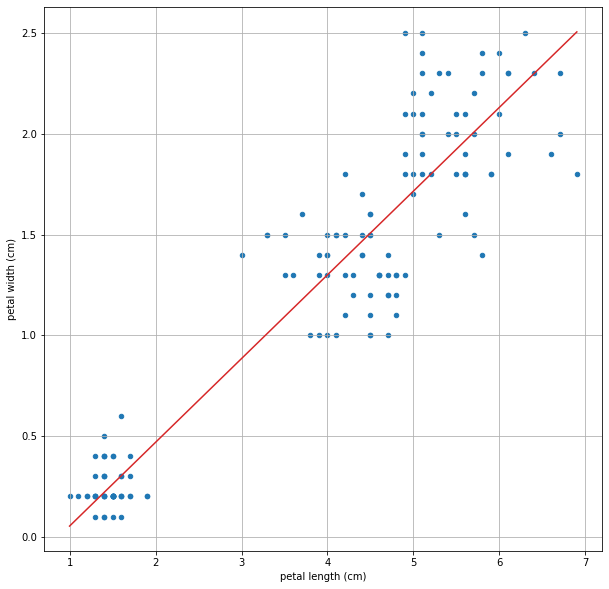

In [27]:
ax = iris.data.plot.scatter(x="petal length (cm)", y="petal width (cm)", figsize=(10, 10), grid=True)
x.sort()
ax.plot(x, a * x + b, "-", color="C3")

In [9]:
import seaborn as sns

In [42]:
iris.data["name"] = iris.target
iris.data["name"] = iris.data.name.map({k: v for k, v in enumerate(iris.target_names)})

In [38]:
{k: v for k, v in enumerate(iris.target_names)}

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

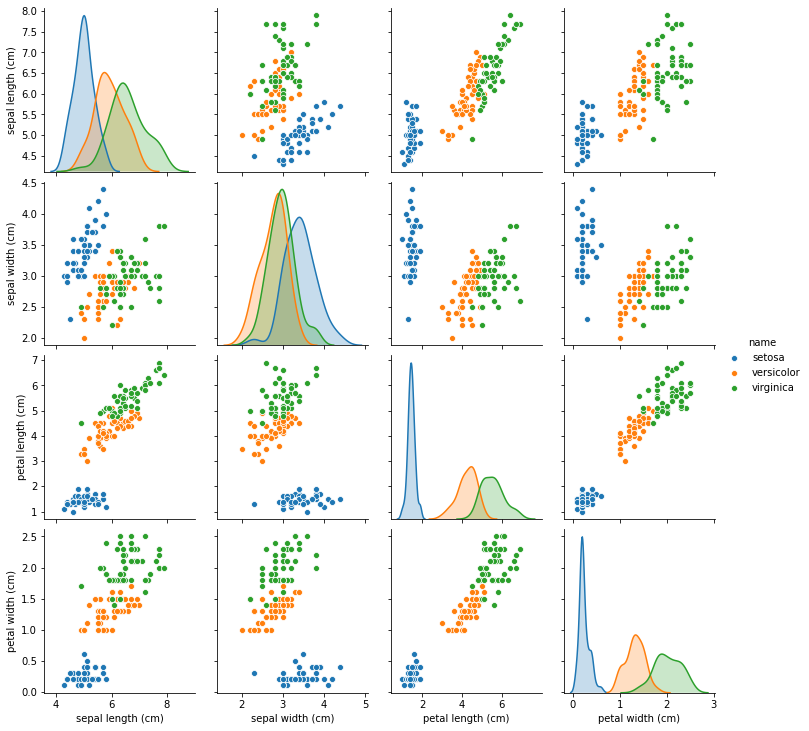

In [43]:
sns.pairplot(iris.data, hue="name")

## 3. Un premier exercice

Voici un premier exercice que l'on peut résoudre en utilisant pandas et les connaissances ci-dessus. Il s'agit d'un exercice de cinétique chimique. On considère la réaction de décomposition de $N_2O$ dont voici la réaction chimique et le tableau d'avancement :

\begin{eqnarray}
& & 2 N_2O   & \longrightarrow & 2N_2 & + & O_2 & & \\
t = 0: & & n_o  & & 0 & & 0\\
t : & & n_o - 2x &                 & 2x   &   & x   & \qquad x_{max} = \frac{n_o}{2} & \qquad & x = \frac{n_o}{2} \tau \\
t : & & n_o (1 -\tau) & & n_o\tau & & \frac{n_o}{2}\tau \\
\end{eqnarray}
Voici un tableau de données de la pression totale $P(t)$ en fonction du temps correspondant au suivi cinétique de la décomposition de $N_2O$ en fonction du temps :

|         |   |       |       |       |       |       |       |
|---------|---|-------|-------|-------|-------|-------|-------|
| t (min) | 0 | 12    |    25 |    45 |    90 |   300 |   540 |
| P(t)    | 1 | 1.062 | 1.120 | 1.195 | 1.314 | 1.482 | 1.499 |

Le taux d'avancement $\tau\in[0;1]$ s'exprime de la façon suivante en fonction de la pression totale :

$$\tau  = 2\left(\frac{P}{P_o} - 1\right)$$

Par ailleurs, si on suppose un modèle d'ordre 1 pour la réaction on peut établir les relations suivantes :

\begin{align*}
    P(t) & = P_o \left(\frac{3}{2} - \frac{1}{2}e^{-2kt} \right) &
    2kt & = \ln\left(\frac{P_o}{3P_o - 2P}\right)
\end{align*}

On note $$y=\ln\left(\frac{P_o}{3P_o - 2P}\right)$$

L'objectif est de déterminer la valeur de la constante $k$.

<div class="alert alert-success">

**Exercice :** Créer une `DataFrame` avec les valeurs du temps, de la pression, du taux d'avancement $\tau$ et la grandeur y.
    
La fonction `ln` est accessible dans le module `numpy` via `np.log()`.
</div>

In [74]:
# données
temps = [0, 12, 25, 45, 90, 300, 540]
pression = [1, 1.062, 1.120, 1.195, 1.314, 1.482, 1.499]
P_o = 1.0

# tableau
df = pd.DataFrame(pression, index=temps, columns=["pression"])
df.index.name = "temps"
df["tau"] = 2 * (df.pression / P_o - 1)
df["y"] = np.log(P_o / (3 * P_o - 2 * df.pression))
df

pression    tau         y
temps                           
0         1.000  0.000  0.000000
12        1.062  0.124  0.132389
25        1.120  0.240  0.274437
45        1.195  0.390  0.494296
90        1.314  0.628  0.988861
300       1.482  0.964  3.324236
540       1.499  0.998  6.214608

<AxesSubplot:xlabel='temps'>

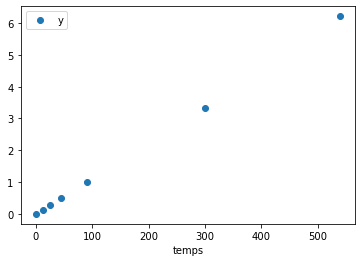

In [65]:
df.plot(y="y", linestyle="", marker="o")

In [67]:
from scipy.stats import linregress

In [73]:
a, b, r, pvalue, stderr = linregress(df.index, df.y)
print(f"pente                        : {a:.5f}")
print(f"ordonnée à l'origine         : {b:.5f}")
print(f"coefficient de détermination : {r**2:.5f}")

pente                        : 0.01146
ordonnée à l'origine         : -0.02366
coefficient de détermination : 0.99963
